In [1]:
#Utilizando random para generar numeros aleatorios
import random
random.seed(1984) #semilla para replicar la aleatoriedad
random.random() #primer llamado o random

0.36352835585530807

In [2]:
random.random() #segundo llamando o random

0.49420568181919666

In [3]:
for i in range(5):
    print(random.random()) #5 numeros aleatorios

0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343


In [4]:
# volviendo a llamar a seed para replicar el mismo resultado aleatorio.
random.seed(1984)
for i in range(7):
    print(random.random()) #Mismos resultados que arriba

0.36352835585530807
0.49420568181919666
0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343


In [6]:
import random

In [14]:
#Generar rango
INTERVAL=2000

circulo_puntos=0 #Puntos dentro del circulo
cuadrado_puntos=0 #Puntos dentro del circulo

In [17]:
for i in range(INTERVAL**2):
    #Generacion de puntos
    rand_x=random.uniform(-1,1)
    rand_y=random.uniform(-1,1)
    
    #Distancia de cada punto del origen
    origin_dist=(rand_x**2+rand_y**2)**0.5
    
    #Comprobar si el punto esta dentro del circulo
    if origin_dist<=1:
        circulo_puntos+=1
    cuadrado_puntos+=1
    
    #Obtención del valor de PI
    pi=4*circulo_puntos/cuadrado_puntos
    
#ESTIMACION FINAL
print("PI ESTIMADO: ",pi)
print('PUNTOS TOTALES: ', cuadrado_puntos)
    

PI ESTIMADO:  3.140888
PUNTOS TOTALES:  4000000


In [19]:
#importando modulos necesarios
import matplotlib.pyplot as plt
import numpy as np #importando numpy
import pandas as pd 
from scipy import stats

np.random.seed(1984) #para poder replicar el random
%matplotlib inline

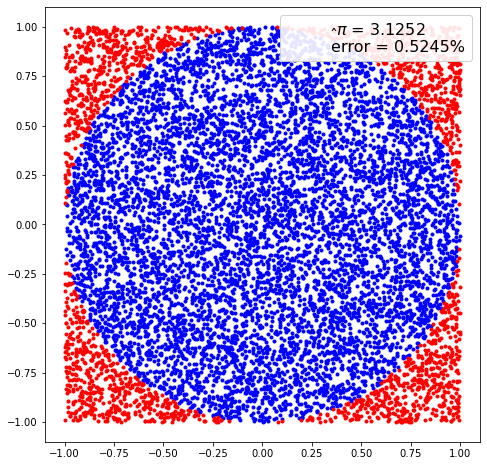

In [29]:
#Ejemplo: Aproximando el valor de pi - area de un circulo de radio=1

def mc_pi_aprox(N=10000):
    plt.figure(figsize=(8,8))
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)



mc_pi_aprox()

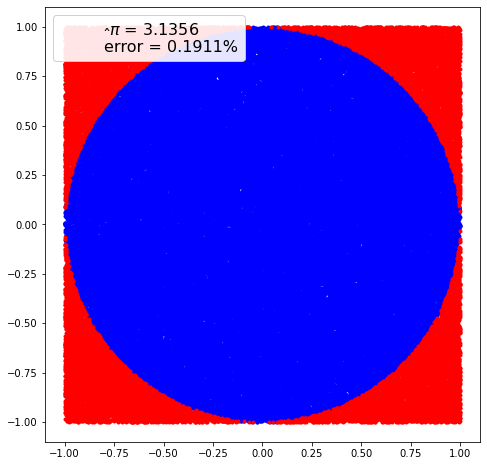

In [30]:
#con 100000 experimentos
mc_pi_aprox(N=100000)

In [36]:
P=np.array([[0.3,0.2,0.5],
           [0.4,0.3,0.3],
            [0.3,0.4,0.3]])
P

array([[0.3, 0.2, 0.5],
       [0.4, 0.3, 0.3],
       [0.3, 0.4, 0.3]])

In [41]:
p1=np.array([1,0,0])
for i in range(1,12):
    p_i=p1@P
    print('p_{0:}= {1:}'.format(i, p_i))
    p1=p_i

p_1= [0.3 0.2 0.5]
p_2= [0.32 0.32 0.36]
p_3= [0.332 0.304 0.364]
p_4= [0.3304 0.3032 0.3664]
p_5= [0.33032 0.3036  0.36608]
p_6= [0.33036  0.303576 0.366064]
p_7= [0.3303576 0.3035704 0.366072 ]
p_8= [0.33035704 0.30357144 0.36607152]
p_9= [0.33035714 0.30357145 0.36607141]
p_10= [0.33035714 0.30357143 0.36607143]
p_11= [0.33035714 0.30357143 0.36607143]


In [47]:
#Ejemplo algoritmo metropolis
def metropolis(func,steps=100000):
    """"A very simple Metropolis implementation"""
    muestras=np.zeros(steps)
    old_x=func.mean()
    old_prob=func.pdf(old_x)
    
    for i in range(steps):
        new_x=old_x + np.random.normal(0,0.5)
        new_prob=func.pdf(new_x)
        aceptacion=new_prob/old_prob
        if aceptacion >= np.random.random():
            muestras[i]=new_x
            old_x=new_x
            old_prob=new_prob
        else: 
            muestras[i]=old_x
    
    return muestras

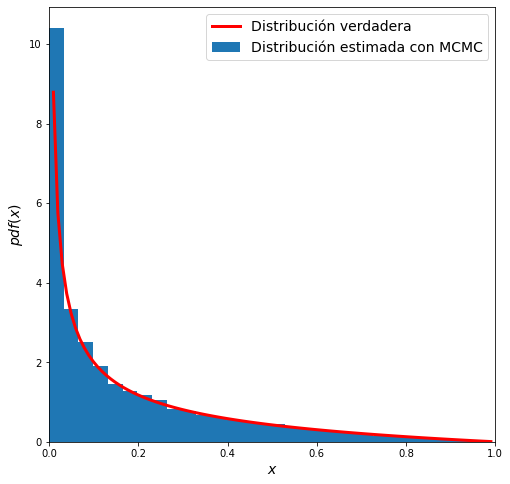

In [68]:
#distribucion beta
func = stats.beta(0.4, 2)
samples = metropolis(func=func, steps=100000)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(0, 1)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, density=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

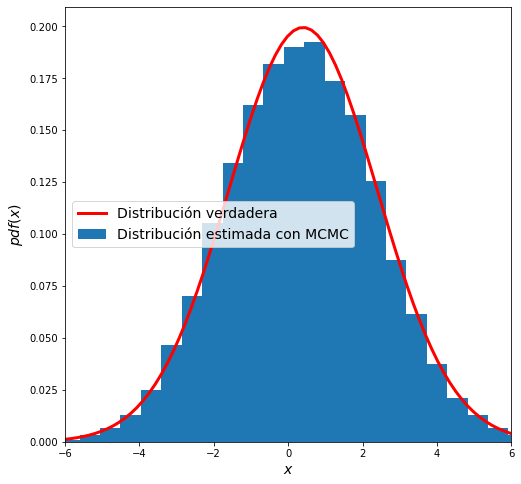

In [71]:
# distribución normal
func = stats.norm(0.4, 2)
samples = metropolis(func=func)
x = np.linspace(-6, 10, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(-6, 6)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, density=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [51]:
#Programa para evaluar integrales definidas con MONTECARLO

In [52]:
#Integral definida en el intervalo [2,3] de la funcion F(x)=x2+4xxsin(x) con respecto a x

Monte Carlo estimation 11.807197558206582 Exact number= 11.811358925098283


C:\Users\eduma\AppData\Local\Temp/ipykernel_14924/1204364326.py:32: RuntimeWarning: invalid value encountered in double_scalars
  Imc[N] = (b-a) * np.sum(Y)/N;


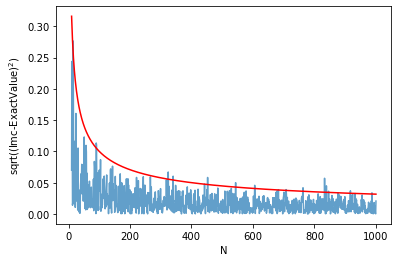

In [72]:
import numpy as np
import matplotlib.pyplot as plt



def f(x):
    return x**2 + 4*x*np.sin(x)
def intf(x):
    return x**3/3.0+4.0*np.sin(x) - 4.0*x*np.cos(x)
a = 2;
b = 3;



N = 10000
X = np.random.uniform(low=a, high=b, size=N)
Y = f(X)



Imc = (b-a) * np.sum(Y)/N;
exactval = intf(b) - intf(a)
print("Monte Carlo estimation", Imc, "Exact number=", intf(b) - intf(a))



Imc = np.zeros(1000)
Na = np.linspace(0,1000,1000)
for N in np.arange(0,1000):
    X = np.random.uniform(low=a, high=b, size=N)
    Y = f(X)
    Imc[N] = (b-a) * np.sum(Y)/N;
plt.plot(Na[10:], np.sqrt((Imc[10:]-exactval)**2), alpha=0.7)
plt.plot(Na[10:], 1/np.sqrt(Na[10:]), "r")
plt.xlabel("N")
plt.ylabel("sqrt((Imc-ExactValue)$^2$)")
plt.show()

3.141592653589793


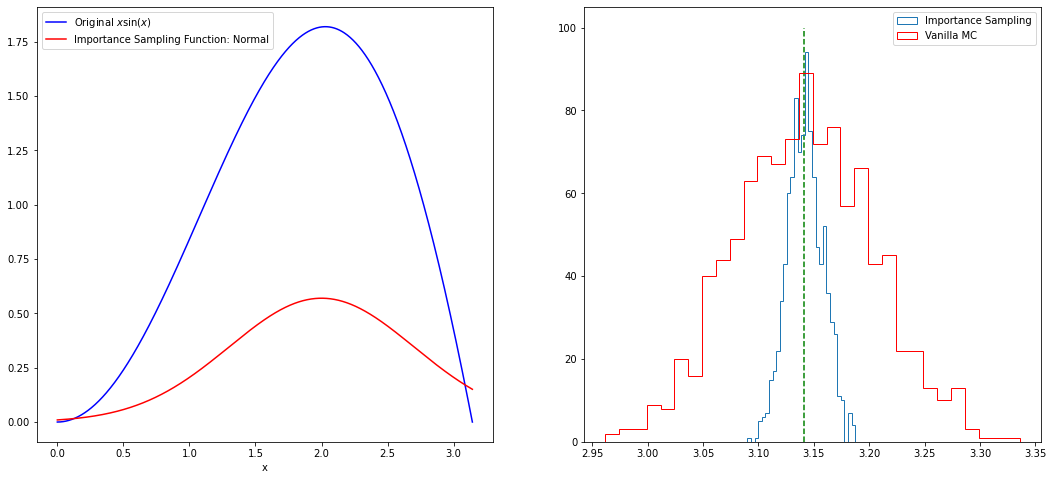

In [74]:
# -*- coding: utf-8 -*-
# Example: Calculate ∫sin(x)xdx

# The function has a shape that is similar to Gaussian and therefore
# we choose here a Gaussian as importance sampling distribution.
from scipy import stats
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
mu = 2;
sig =.7;
f = lambda x: np.sin(x)*x
infun = lambda x: np.sin(x)-x*np.cos(x)
p = lambda x: (1/np.sqrt(2*np.pi*sig**2))*np.exp(-(x-mu)**2/(2.0*sig**2))
normfun = lambda x: norm.cdf(x-mu, scale=sig)

plt.figure(figsize=(18,8)) # set the figure size
# range of integration
xmax =np.pi
xmin =0
# Number of draws
N =1000
# Just want to plot the function
x=np.linspace(xmin, xmax, 1000)
plt.subplot(1,2,1)
plt.plot(x, f(x), 'b', label=u'Original $x\sin(x)$')
plt.plot(x, p(x), 'r', label=u'Importance Sampling Function: Normal')
plt.xlabel('x')
plt.legend()
# =============================================
# EXACT SOLUTION
# =============================================
Iexact = infun(xmax)-infun(xmin)
print (Iexact)
# ============================================
# VANILLA MONTE CARLO
# ============================================
Ivmc = np.zeros(1000)
for k in np.arange(0,1000):
    x = np.random.uniform(low=xmin, high=xmax, size=N)
    Ivmc[k] = (xmax-xmin)*np.mean(f(x))
# ============================================
# IMPORTANCE SAMPLING
# ============================================
# CHOOSE Gaussian so it similar to the original functions

# Importance sampling: choose the random points so that
# more points are chosen around the peak, less where the integrand is small.
Iis = np.zeros(1000)
for k in np.arange(0,1000):
    # DRAW FROM THE GAUSSIAN: xis~N(mu,sig^2)
    xis = mu + sig*np.random.randn(N,1);
    xis = xis[ (xis<xmax) & (xis>xmin)] ;
    # normalization for gaussian from 0..pi
    normal = normfun (np.pi) -normfun (0) # Nota: La integral de la función de densidad de probabilidad en el intervalo de muestreo [0 pi] debe ser igual a 1
    Iis [k] = np.mean (f (xis) / p (xis)) * normal # Por lo tanto, aquí se debe multiplicar un coeficiente, es decir, la integral de p (x) en [0 pi]
plt.subplot(1,2,2)
plt.hist(Iis,30, histtype='step', label=u'Importance Sampling');
plt.hist(Ivmc, 30, color='r',histtype='step', label=u'Vanilla MC');
plt.vlines(np.pi, 0, 100, color='g', linestyle='dashed')
plt.legend()
plt.show()